# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Importing the dataset

In [3]:
data=pd.read_csv('Transformed Data Set - Logistics regression.csv')

In [4]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [6]:
data.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [7]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [8]:
def unique (name,column):
    return name[f'{column}'].unique()
def nunique (name,column):
    return name[f'{column}'].nunique()
def value (name,column):
    return name[f'{column}'].value_counts()

In [9]:
unique(data,'Favorite Color')

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [10]:
nunique(data,'Favorite Color')

3

In [11]:
value(data,'Favorite Color')

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [12]:
unique(data,'Favorite Music Genre')

array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [13]:
value(data,'Favorite Music Genre')

Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [14]:
unique(data,'Favorite Beverage')

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [15]:
value(data,'Favorite Beverage')

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [16]:
unique(data,'Favorite Soft Drink')

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

In [17]:
value(data,'Favorite Soft Drink')

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [18]:
unique(data,'Gender')

array(['F', 'M'], dtype=object)

In [19]:
value(data,'Gender')

Gender
F    33
M    33
Name: count, dtype: int64

# Data preprocessing

In [20]:
data['Favorite Color'].replace({'Cool':1,'Neutral':2,'Warm':3},inplace=True)

In [21]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,Rock,Vodka,7UP/Sprite,F
1,2,Hip hop,Vodka,Coca Cola/Pepsi,F
2,3,Rock,Wine,Coca Cola/Pepsi,F
3,3,Folk/Traditional,Whiskey,Fanta,F
4,1,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,1,Rock,Vodka,Coca Cola/Pepsi,M
62,1,Hip hop,Beer,Coca Cola/Pepsi,M
63,2,Hip hop,Doesn't drink,Fanta,M
64,1,Rock,Wine,Coca Cola/Pepsi,M


In [22]:
data['Favorite Music Genre'].unique()

array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [23]:
data['Favorite Music Genre'].replace({'Rock':1,'Hip hop':2,'Folk/Traditional':3,'Jazz/Blues':4,'Pop':5,'Electronic':6,'R&B and soul':7},inplace=True)

In [24]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,Vodka,7UP/Sprite,F
1,2,2,Vodka,Coca Cola/Pepsi,F
2,3,1,Wine,Coca Cola/Pepsi,F
3,3,3,Whiskey,Fanta,F
4,1,1,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,1,1,Vodka,Coca Cola/Pepsi,M
62,1,2,Beer,Coca Cola/Pepsi,M
63,2,2,Doesn't drink,Fanta,M
64,1,1,Wine,Coca Cola/Pepsi,M


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     int64 
 1   Favorite Music Genre  66 non-null     int64 
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.7+ KB


In [26]:
unique(data,'Favorite Beverage')

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [27]:
data['Favorite Beverage'].replace({'Vodka':1,'Wine':2,"Doesn't drink":3,'Beer':4,'Other':5,'Whiskey':6},inplace=True)

In [28]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,1,7UP/Sprite,F
1,2,2,1,Coca Cola/Pepsi,F
2,3,1,2,Coca Cola/Pepsi,F
3,3,3,6,Fanta,F
4,1,1,1,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,1,1,1,Coca Cola/Pepsi,M
62,1,2,4,Coca Cola/Pepsi,M
63,2,2,3,Fanta,M
64,1,1,2,Coca Cola/Pepsi,M


In [29]:
unique(data,'Favorite Soft Drink')

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

In [30]:
data['Favorite Soft Drink'].replace({'7UP/Sprite':1,'Coca Cola/Pepsi':2,"Fanta":3,'Other':4},inplace=True)

In [31]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,1,1,F
1,2,2,1,2,F
2,3,1,2,2,F
3,3,3,6,3,F
4,1,1,1,2,F
...,...,...,...,...,...
61,1,1,1,2,M
62,1,2,4,2,M
63,2,2,3,3,M
64,1,1,2,2,M


In [32]:
unique(data,'Gender')

array(['F', 'M'], dtype=object)

In [33]:
data['Gender'].replace({'F':1,'M':2},inplace=True)

In [34]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,1,1,1
1,2,2,1,2,1
2,3,1,2,2,1
3,3,3,6,3,1
4,1,1,1,2,1
...,...,...,...,...,...
61,1,1,1,2,2
62,1,2,4,2,2
63,2,2,3,3,2
64,1,1,2,2,2


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Favorite Color        66 non-null     int64
 1   Favorite Music Genre  66 non-null     int64
 2   Favorite Beverage     66 non-null     int64
 3   Favorite Soft Drink   66 non-null     int64
 4   Gender                66 non-null     int64
dtypes: int64(5)
memory usage: 2.7 KB


# Gender wise favorite color count visualisation

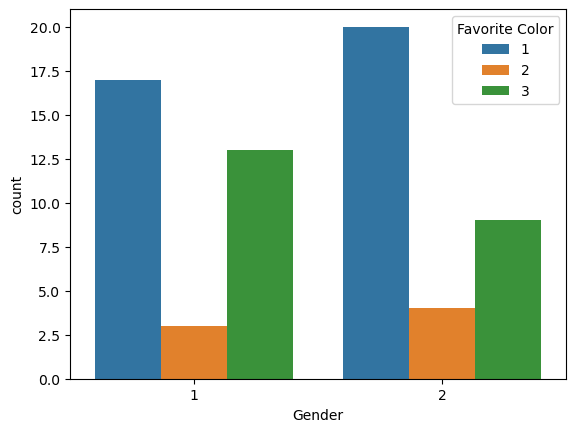

In [36]:
ax=sns.countplot(x=data['Gender'],hue=data['Favorite Color'])

# Gender wise favorite music genre count visualisation

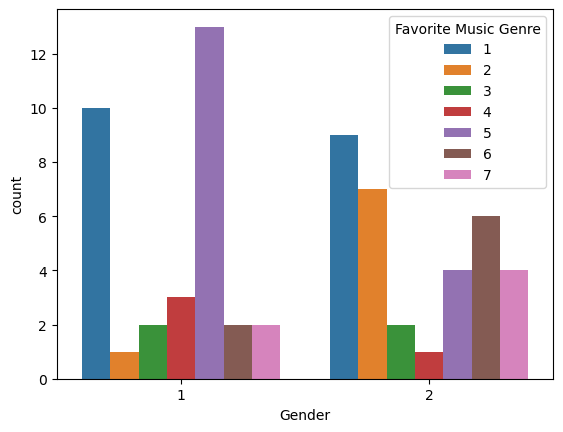

In [37]:
ax=sns.countplot(x=data['Gender'],hue=data['Favorite Music Genre'])

# Gender wise favorite color and its favorite music genre visualisation

<Axes: xlabel='Favorite Color', ylabel='Favorite Music Genre'>

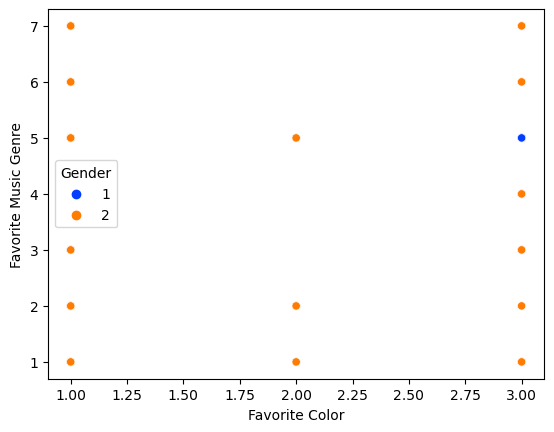

In [38]:
sns.scatterplot(x=data['Favorite Color'],y=data['Favorite Music Genre'],hue=data['Gender'],palette='bright')

# Favorite beverage and its favorite soft drink visualisation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_30800\2182874466.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=blue`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Favorite Soft Drink'],y=data['Favorite Beverage'],fill=True,shade='blue',color='orange')


<Axes: xlabel='Favorite Soft Drink', ylabel='Favorite Beverage'>

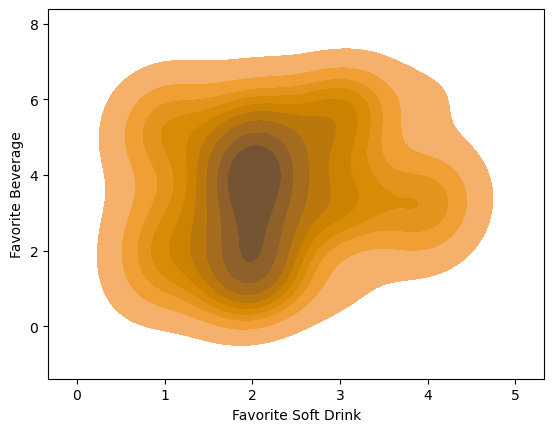

In [39]:
sns.kdeplot(x=data['Favorite Soft Drink'],y=data['Favorite Beverage'],fill=True,shade='blue',color='orange')

# Favorite beverage and its favorite color visualisation

<Axes: xlabel='Favorite Beverage', ylabel='Favorite Color'>

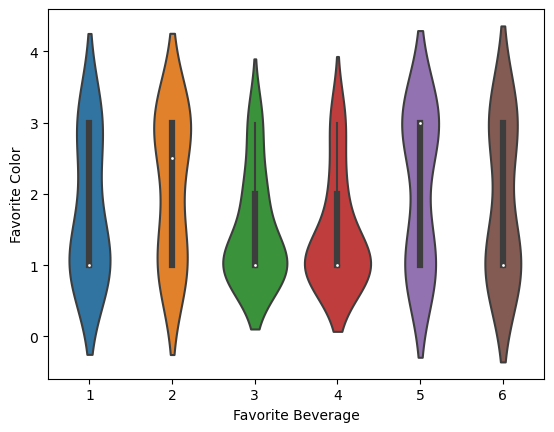

In [40]:
sns.violinplot(x=data['Favorite Beverage'],y=data['Favorite Color'])

# Favorite music genre and its favorite beverage visualisation

D:\Mani\VDO\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


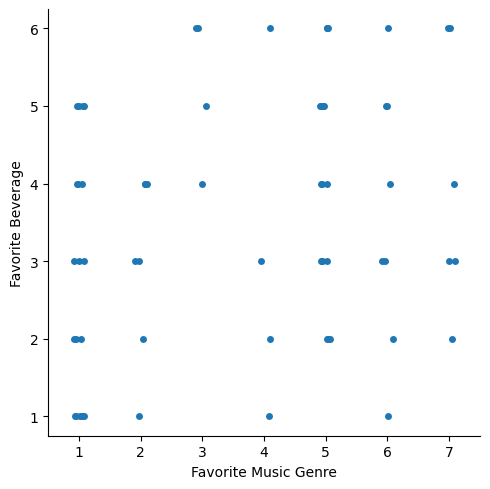

In [41]:
sns.catplot(x=data['Favorite Music Genre'],y=data['Favorite Beverage'])

# Outlier - detection method

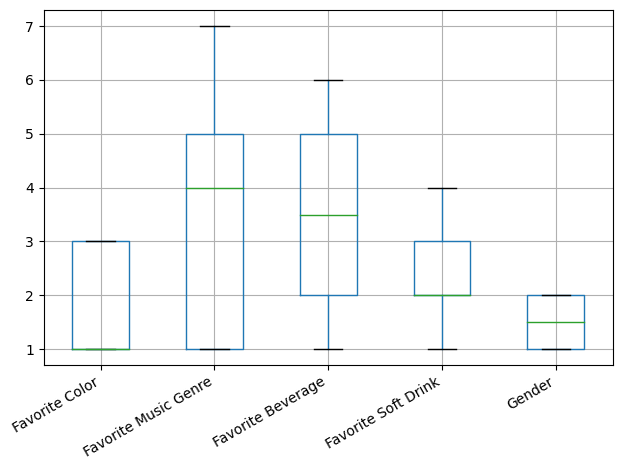

In [42]:
a=data.boxplot()
a.set_xticklabels(a.get_xticklabels(),rotation=30,ha='right',fontsize=10)
plt.tight_layout()

In [43]:
from scipy import stats

In [44]:
z = np.abs(stats.zscore(data))
print(z)

    Favorite Color  Favorite Music Genre  Favorite Beverage  \
0         0.841969              1.222845           1.583612   
1         0.247638              0.753614           1.583612   
2         1.337246              1.222845           0.953983   
3         1.337246              0.284383           1.564532   
4         0.841969              1.222845           1.583612   
..             ...                   ...                ...   
61        0.841969              1.222845           1.583612   
62        0.841969              0.753614           0.305275   
63        0.247638              0.753614           0.324354   
64        0.841969              1.222845           0.953983   
65        0.841969              1.123311           0.305275   

    Favorite Soft Drink  Gender  
0              1.388118     1.0  
1              0.257059     1.0  
2              0.257059     1.0  
3              0.874000     1.0  
4              0.257059     1.0  
..                  ...     ...  
61   

In [45]:
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


# Outlier removed data

In [46]:
data1=data[(z<3).all(axis=1)]

In [47]:
data1

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,1,1,1
1,2,2,1,2,1
2,3,1,2,2,1
3,3,3,6,3,1
4,1,1,1,2,1
...,...,...,...,...,...
61,1,1,1,2,2
62,1,2,4,2,2
63,2,2,3,3,2
64,1,1,2,2,2


In [48]:
print(data.shape)
print(data1.shape)

(66, 5)
(66, 5)


# Splitting the dataset into the training set and test set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
future=data.drop('Gender',axis=1)
target=data['Gender']

In [51]:
X_train,x_test,Y_train,y_test=train_test_split(future,target,test_size=0.2)

# Fitting SVM to the training set

In [52]:
from sklearn import svm
Svm=svm.SVC()
model=Svm.fit(X_train,Y_train)
y_pred=model.predict(x_test)

# Predicting the test set results

In [53]:
y_pred

array([2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Making the confusion matrix

In [55]:
confusion_matrix(y_test,y_pred)

array([[4, 3],
       [4, 3]], dtype=int64)

# Machine performance score

In [56]:
accuracy_score(y_test,y_pred)

0.5

In [57]:
x_test

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
25,3,7,6,2
37,1,5,5,3
59,1,5,6,4
54,1,6,3,3
29,1,6,3,3
63,2,2,3,3
17,1,1,5,2
18,1,1,5,2
13,3,6,2,2
10,1,5,5,1


# Machine output

In [58]:
model.predict([[2,4,2,1]])

D:\Mani\VDO\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)